## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import timeit
import pickle 
from os import path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , explained_variance_score
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, roc_curve, classification_report, auc)
import warnings
warnings.filterwarnings("ignore")

## Readind Dataset

In [45]:
multiclass_data = pd.read_csv('multiclass_data.csv')
multiclass_data = multiclass_data.iloc[:,1:]

## Splitting of training & testing dataset

In [46]:
X = multiclass_data.drop(columns=['label'],axis=1)
Y = multiclass_data['label']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=5)

### Decision Tree & Random Forest for Level - 1 & Level - 2 classification

In [47]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
rf = RandomForestClassifier(n_estimators=20,criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

### Saving Model formed
- Decision Tree

In [7]:
pkl_filename = "models/dt_multi.pkl"
if (not path.isfile(pkl_filename)): 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(dt, file)
        print("DT model saved to disk")
else:
    print("Model already saved")

DT model saved to disk


- Random Forest

In [8]:
pkl_filename = "models/rf_multi.pkl"
if (not path.isfile(pkl_filename)): 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(dt, file)
        print("RF model saved to disk")
else:
    print("Model already saved")

RF model saved to disk


### Getting the Threshold value

In [49]:
xt = X_train.values
avg = 0.0
save_time = []
for x in xt:
    start = timeit.default_timer()
    y_ = dt.predict([x]) 
    stop = timeit.default_timer()
    avg += (stop - start)
    save_time.append(stop-start)
#     print(stop - start)
theta_ = avg / xt.shape[0]

- Storing the dropped packets & received packets

In [50]:
drop_packets = []
xt = X_test.values
yt = y_test.values

### Level 1 classifier - DT

In [51]:
dataset_collected_for_rf_ind = []
data_dt_ypred_y_true = []
total_rf = 0
for i in range(xt.shape[0]):
    start = timeit.default_timer()
    y_pred = dt.predict([xt[i]])
    if timeit.default_timer() - start > theta_:
        total_rf += 1
        dataset_collected_for_rf_ind.append(i)
        continue
#     if y_pred != 6:
#         drop_packets.append(xt[i])
    data_dt_ypred_y_true.append([y_pred,yt[i]])

### Checking the peformance metrics for Level 1 classifier - DT

In [52]:
ctt = 0
dt_y_pred = []
dt_y_test = []
for y_p , y_t in data_dt_ypred_y_true:
    dt_y_pred.append(y_p)
    dt_y_test.append(y_t)
    if y_p != y_t:
        ctt += 1

In [53]:
print("Mean Squared Error      - " , mean_squared_error(dt_y_test, dt_y_pred))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(dt_y_test, dt_y_pred)))
print("R2 Score                - " , explained_variance_score(dt_y_test, dt_y_pred)*100)
print("Accuracy                - ",accuracy_score(dt_y_test,dt_y_pred)*100)
print(classification_report(y_true=dt_y_test, y_pred=dt_y_pred,target_names=['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms']))
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
# ['Analysis0', 'Backdoor1', 'DoS2', 'Exploits3', 'Fuzzers4', 'Generic5','Normal6', 'Reconnaissance7', 'Worms8']

Mean Squared Error      -  0.2062241672744955
Root Mean Squared Error -  0.45411911132928057
R2 Score                -  86.26036695681954
Accuracy                -  97.04352054461464
                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       147
      Backdoor       0.08      0.09      0.08        22
           DoS       1.00      1.00      1.00       477
      Exploits       1.00      1.00      1.00      4060
       Fuzzers       0.48      0.38      0.42       430
       Generic       0.98      0.99      0.99      9926
        Normal       1.00      1.00      1.00      5043
Reconnaissance       0.55      0.52      0.53       436
         Worms       0.10      0.17      0.12        24

      accuracy                           0.97     20565
     macro avg       0.69      0.68      0.68     20565
  weighted avg       0.97      0.97      0.97     20565



### Plot between Real and Predicted Data - L1 Classifier DT

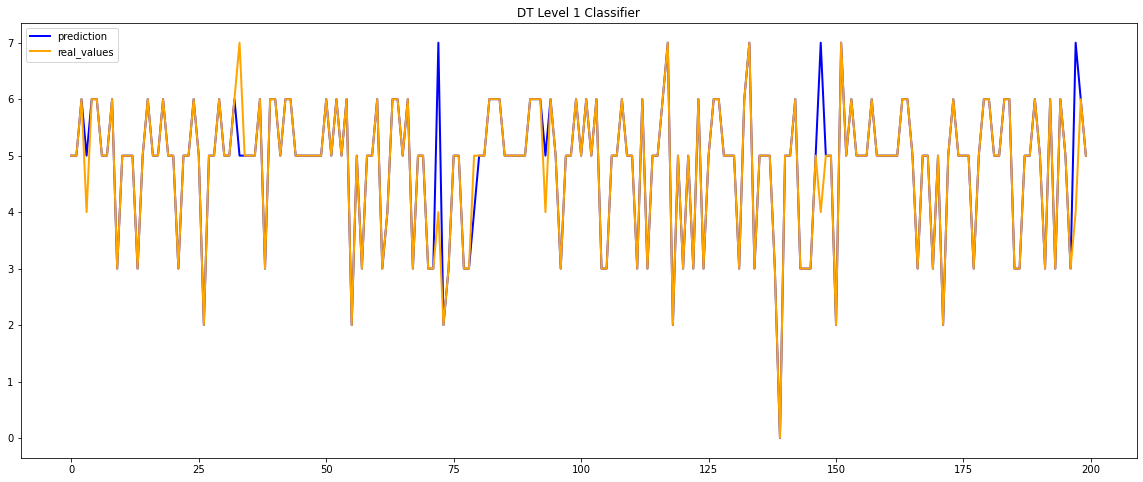

In [54]:
plt.figure(figsize=(20,8))
plt.plot(dt_y_pred[0:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(dt_y_test[0:200], label="real_values", linewidth=2.0,color='orange')
plt.legend(loc="best")
plt.title("DT Level 1 Classifier")
plt.savefig('plots/L1_DT_multi.jpg')
plt.show()

### Level 2 classifier - RF

In [55]:
data_rf_ypred_y_true = []
for ind in dataset_collected_for_rf_ind:
    y_pred = rf.predict([xt[ind]])
#     if y_pred != 6:
#         drop_packets.append(xt[ind])
    data_rf_ypred_y_true.append([y_pred,yt[ind]])

### Checking the peformance metrics for Level 2 classifier - RF

In [56]:
ctt2 = 0
rf_y_pred = []
rf_y_test = []
for y_p , y_t in data_rf_ypred_y_true:
    rf_y_pred.append(y_p)
    rf_y_test.append(y_t)
    if y_p != y_t:
        ctt2 += 1

In [57]:
print("Mean Squared Error      - " , mean_squared_error(rf_y_test, rf_y_pred))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(rf_y_test, rf_y_pred)))
print("R2 Score                - " , explained_variance_score(rf_y_test, rf_y_pred)*100)
print("Accuracy                - ",accuracy_score(rf_y_test,rf_y_pred)*100)
print(classification_report(y_true=rf_y_test, y_pred=rf_y_pred,target_names=['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms']))
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
# ['Analysis0', 'Backdoor1', 'DoS2', 'Exploits3', 'Fuzzers4', 'Generic5','Normal6', 'Reconnaissance7', 'Worms8']

Mean Squared Error      -  0.19514127277528387
Root Mean Squared Error -  0.44174797427411466
R2 Score                -  87.00582673284153
Accuracy                -  97.20095062054396
                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00        26
      Backdoor       0.00      0.00      0.00         3
           DoS       1.00      1.00      1.00        82
      Exploits       1.00      1.00      1.00       776
       Fuzzers       0.51      0.52      0.52        77
       Generic       0.99      0.99      0.99      1846
        Normal       1.00      1.00      1.00       882
Reconnaissance       0.53      0.57      0.55        87
         Worms       0.50      0.12      0.20         8

      accuracy                           0.97      3787
     macro avg       0.73      0.69      0.70      3787
  weighted avg       0.97      0.97      0.97      3787



### Plot between Real and Predicted Data - L2 Classifier RF

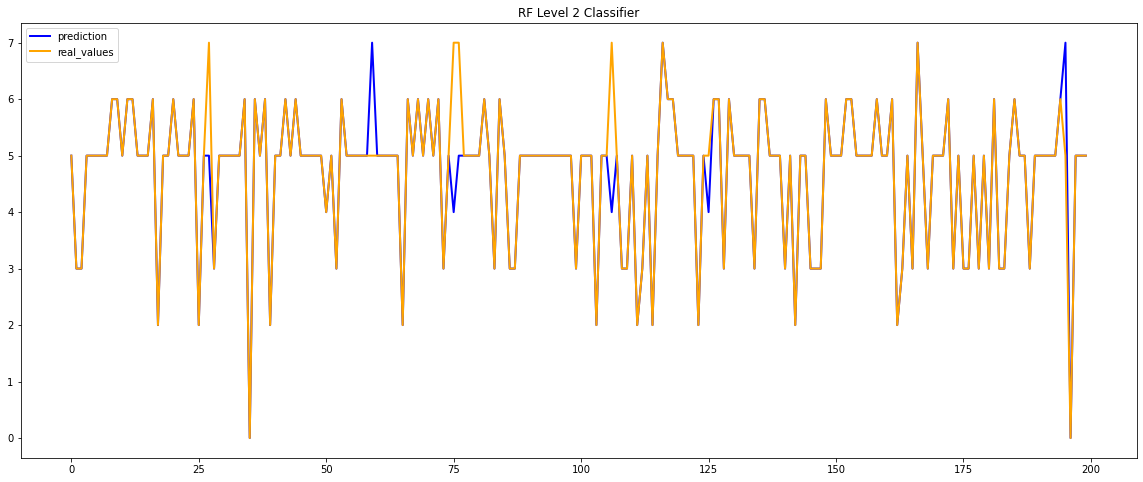

In [58]:
plt.figure(figsize=(20,8))
plt.plot(rf_y_pred[0:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(rf_y_test[0:200], label="real_values", linewidth=2.0,color='orange')
plt.legend(loc="best")
plt.title("RF Level 2 Classifier")
plt.savefig('plots/L2_RF_multi.jpg')
plt.show()

In [59]:
drop_packets

[array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0.99212598, 1.        , 1.        , 0.0363842 , 0.01589866,
        0.03235816, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 array([0.99212598, 1.        , 1.        , 0.08286901, 0.06005749,
        0.06510676, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ]),
 array([0., 0., 0., 0., 0., 

In [60]:
np.savetxt('Drop_packets/dropped.txt', drop_packets, delimiter=',')